# Read df_cases

In [ ]:
! pip install geopandas
! pip install plotnine

In [13]:
import os 
import numpy as np
import geopandas as gpd

In [29]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line

In [2]:
os.chdir("/home/wesley/Dengue/Shapefiles for EHI/")

In [8]:
df = gpd.read_file('DF_Cases.shp')

In [10]:
coi = ["CASE_ID", "CLUSTER_ID", "NEA_ONSET_", "SEROTYPE", "RESIDENTIA", "POSTAL"]

column_mapping = {
    "CASE_ID": "case_id",         # Rename CASE_ID to case_id
    "CLUSTER_ID": "cluster_id",   # Rename CLUSTER_ID to cluster_id
    "NEA_ONSET_": "date",         # Rename NEA_ONSET_ to date
    "SEROTYPE": "serotype",       # Rename SEROTYPE to serotype
    "RESIDENTIA": "residential",  # Rename RESIDENTIA to residential
    "POSTAL": "postal"            # Rename POSTAL to postal
}
df = df.loc[:, coi].rename(columns=column_mapping)
df['cluster_id'] = df['cluster_id'].replace('0', np.nan)
df['serotype'] = df['serotype'].apply(
    lambda x: [int(s.strip()) for s in x.split(',')] if isinstance(x, str) else []
)

In [11]:
df

,case_id,cluster_id,date,serotype,residential,postal
0,DENF-2024-011098,20241310,2024-08-06,[2],2,085101
1,DENF-2024-011086,20241264,2024-08-06,[],1,439866
2,DENF-2024-011092,20241235,2024-08-04,[2],1,431008
3,DENF-2024-011089,20241261,2024-08-02,[3],1,383115
4,DENF-2024-011110,NaN,2024-07-30,[],1,381003
...,...,...,...,...,...,...
11585,DENF-2024-011914,NaN,2024-09-03,[],1,680103
11586,DENF-2024-011925,NaN,2024-08-31,[],2,788545
11587,DENF-2024-011912,NaN,2024-09-03,[],1,730339
11588,DENF-2024-011909,NaN,2024-09-03,[],1,730514


In [23]:
df_grouped = df.groupby("date").size().reset_index(name="ncases").query("date > '2019-01-01'")

In [24]:
df_grouped

,date,ncases
6,2022-04-22,1
7,2022-12-14,1
8,2023-01-03,1
9,2023-01-27,1
10,2023-03-30,2
...,...,...
275,2024-08-30,20
276,2024-08-31,23
277,2024-09-01,14
278,2024-09-02,21


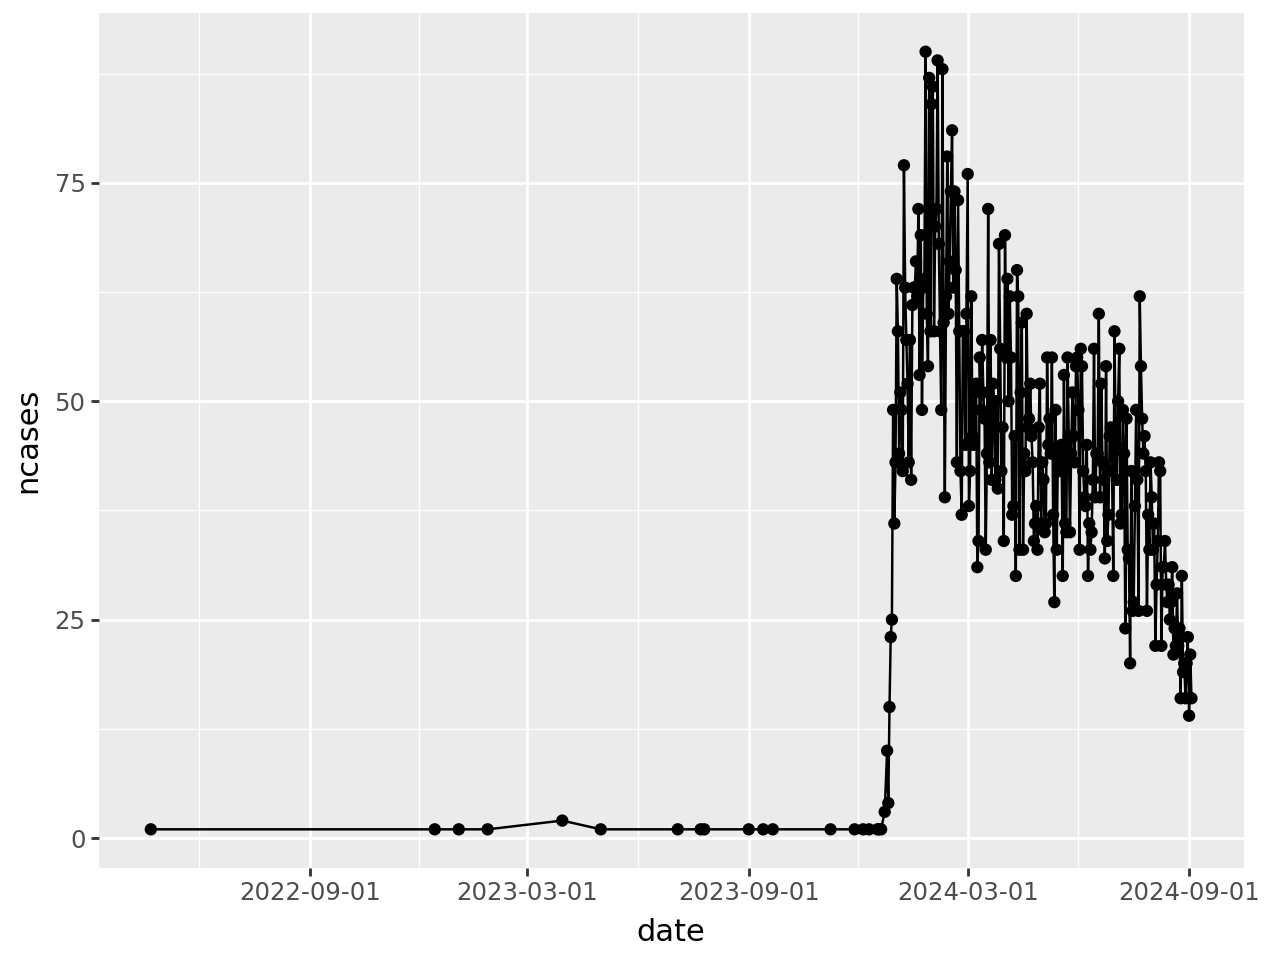

In [30]:
(
    ggplot(df_grouped, aes("date", "ncases")) 
    + geom_point() 
    + geom_line()
)